In [66]:
import pandas as pd
import numpy as np
from utils import costants
import nltk
from sklearn.model_selection import train_test_split
#nltk.download()

In [2]:
data = pd.read_csv(costants.CSV_PATH, sep=",", names=['sentiment', 'text'], encoding='latin-1')
data

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [69]:
## 59% neu
## 28% pos
## 13% neg

np.unique(data['sentiment'], return_counts=True)

(array([-1,  0,  1]), array([ 604, 2879, 1363]))

In [65]:
data.shape

(4846, 2)

In [57]:
train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)
train.shape, test.shape

((3876, 2), (970, 2))

In [52]:
data['text'][50]

'The company said that paper demand increased in all of its main markets , including of publication papers , and that it increased average paper prices by 4 percent compared with last year .'

In [3]:
data.columns

Index(['sentiment', 'text'], dtype='object')

In [4]:
data['sentiment'] = data['sentiment'].replace({'neutral':0, 'positive':1, 'negative':-1})

<Axes: >

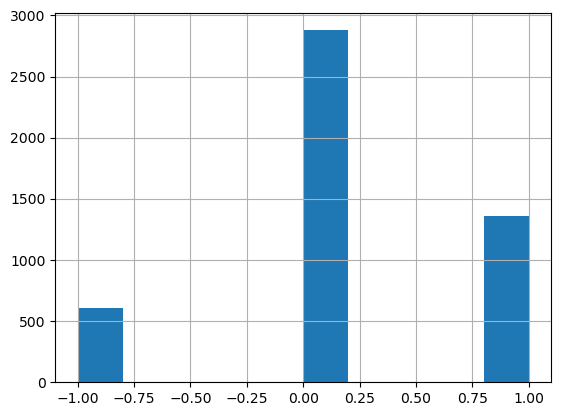

In [59]:
data['sentiment'].hist()

<Axes: >

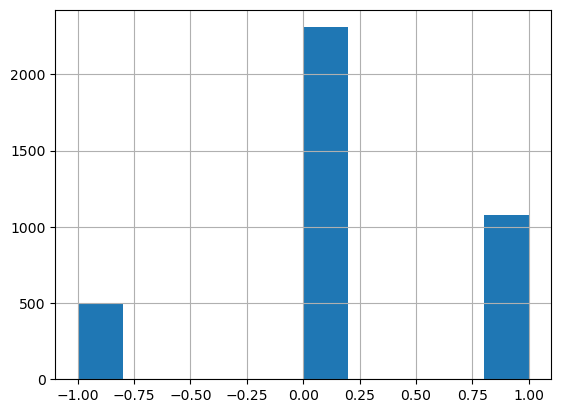

In [58]:
train['sentiment'].hist()

<Axes: >

Exception ignored in: <function tqdm.__del__ at 0x7fb9775735b0>
Traceback (most recent call last):
  File "/Users/william.devena/.conda/envs/NLP/lib/python3.10/site-packages/tqdm/std.py", line 1145, in __del__
    self.close()
  File "/Users/william.devena/.conda/envs/NLP/lib/python3.10/site-packages/tqdm/notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x7fb9775735b0>
Traceback (most recent call last):
  File "/Users/william.devena/.conda/envs/NLP/lib/python3.10/site-packages/tqdm/std.py", line 1145, in __del__
    self.close()
  File "/Users/william.devena/.conda/envs/NLP/lib/python3.10/site-packages/tqdm/notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


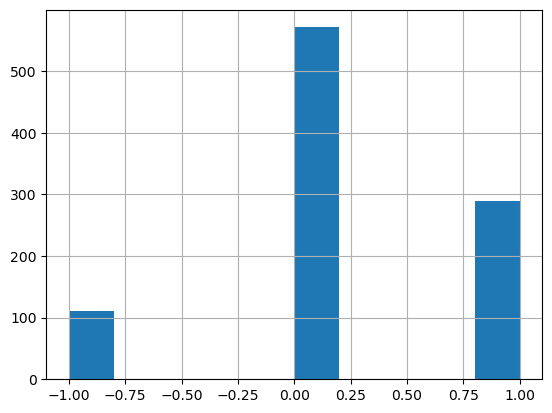

In [60]:
test['sentiment'].hist()

In [20]:
data['sentiment'].value_counts()

 0    2879
 1    1363
-1     604
Name: sentiment, dtype: int64

In [8]:
example = data['text'][50]
example

'The company said that paper demand increased in all of its main markets , including of publication papers , and that it increased average paper prices by 4 percent compared with last year .'

In [9]:
tokens = nltk.word_tokenize(example)
tokens

['The',
 'company',
 'said',
 'that',
 'paper',
 'demand',
 'increased',
 'in',
 'all',
 'of',
 'its',
 'main',
 'markets',
 ',',
 'including',
 'of',
 'publication',
 'papers',
 ',',
 'and',
 'that',
 'it',
 'increased',
 'average',
 'paper',
 'prices',
 'by',
 '4',
 'percent',
 'compared',
 'with',
 'last',
 'year',
 '.']

In [10]:
tagged = nltk.pos_tag(tokens)
tagged

[('The', 'DT'),
 ('company', 'NN'),
 ('said', 'VBD'),
 ('that', 'IN'),
 ('paper', 'NN'),
 ('demand', 'NN'),
 ('increased', 'VBD'),
 ('in', 'IN'),
 ('all', 'DT'),
 ('of', 'IN'),
 ('its', 'PRP$'),
 ('main', 'JJ'),
 ('markets', 'NNS'),
 (',', ','),
 ('including', 'VBG'),
 ('of', 'IN'),
 ('publication', 'NN'),
 ('papers', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('that', 'IN'),
 ('it', 'PRP'),
 ('increased', 'VBD'),
 ('average', 'JJ'),
 ('paper', 'NN'),
 ('prices', 'NNS'),
 ('by', 'IN'),
 ('4', 'CD'),
 ('percent', 'NN'),
 ('compared', 'VBN'),
 ('with', 'IN'),
 ('last', 'JJ'),
 ('year', 'NN'),
 ('.', '.')]

In [18]:
ds_statistics(ds=data)

dict_items([('max_len_text', 315), ('min_len_text', 9), ('mean_len_text', 128.1320676846884)])


{'max_len_text': 315, 'min_len_text': 9, 'mean_len_text': 128.1320676846884}

In [33]:
def calculate_stats_words(ds):
    """
    Calculates statistics on the single words
    in the dataset.

    Args:
        - ds (pd.DataFrame): the dataset, has two
        columns (sentiment and text)

    Returns:
        - list_tot_words (List): contains all
        the world in the ds (with repetitions)
    """
    list_tot_words = []
    for text in ds['text']:
        list_tot_words += nltk.word_tokenize(text)
        
    counts_words = np.unique(list_tot_words, return_counts=True)
    counts_words = sorted(list(zip(*counts_words)), key=lambda x: x[1], reverse=True)
        
    return list_tot_words, counts_words

tot_words, counts_words = calculate_stats_words(data)
len(tot_words), counts_words[:10]

(112174,
 [('.', 4846),
  ('the', 4712),
  (',', 4663),
  ('of', 3202),
  ('in', 2752),
  ('and', 2585),
  ('to', 2496),
  ('a', 1631),
  ('The', 1354),
  ('for', 1130)])

In [50]:
from ipywidgets import FloatProgress

In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [41]:
sia.polarity_scores('hello')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [49]:
#pip install ipywidgets
%jupyter nbextension enable --py widgetsnbextension

UsageError: Line magic function `%jupyter` not found.


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
#import gensim 
#Bag-of-words

#Each row in matrix M contains the frequency of tokens(words) in the document D(i)

bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=None, stop_words='english')
bow = bow_vectorizer.fit_transform(train['text']) # tokenize and build vocabulary
bow.shape

(3876, 3990)

In [63]:
np.array(bow)

array(<3876x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 30553 stored elements in Compressed Sparse Row format>, dtype=object)